In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.extend([
    'openml-python-OpenMLActiveClassificationTask/',
    'openml-scikit-activeml/',
    '../../openml-python-OpenMLActiveClassificationTask/',
    '../../openml-scikit-activeml/',
])

from openml import config, tasks, runs, flows
from openml_skactiveml import PoolSkactivemlModel
from skactiveml.classifier import ParzenWindowClassifier
from skactiveml.pool import RandomSampling, UncertaintySampling, ProbabilisticAL, GreedySamplingX

config.start_using_configuration_for_example()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
task_id = 1328
task = tasks.get_task(task_id)
task

OpenML Active Classification Task
Task Type Description: https://test.openml.org/tt/TaskType.ACTIVE_CLASSIFICATION
Task ID..............: 1328
Task URL.............: https://test.openml.org/t/1328
Estimation Procedure.: crossvalidation
Evaluation Measure...: predictive_accuracy
Target Feature.......: class
# of Classes.........: 3
Cost Matrix..........: Available

In [8]:
model = PoolSkactivemlModel(
    query_strategy=GreedySamplingX(missing_label=None),
    prediction_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
    #selection_model_name="clf",
    #selection_model=ParzenWindowClassifier(missing_label=None, classes=task.class_labels, class_prior=0),
    budget=10000,
)

run = runs.run_model_on_task(
    model,
    task,
    upload_flow=False,
    avoid_duplicate_runs=False,
    n_jobs=-1,
    seed=0
)
run

openml==0.13.1.dev,skactiveml==0.4.1,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
openml==0.13.1.dev,skactiveml==0.4.1,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
,openml==0.13.1.dev,openml_skactiveml==0.0.1,skactiveml==0.4.1,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0


OpenML Run
Uploader Name: None
Metric.......: None
Run ID.......: None
Task ID......: 1328
Task Type....: None
Task URL.....: https://test.openml.org/t/1328
Flow ID......: None
Flow Name....: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._parzen_window_classifier.ParzenWindowClassifier,query_strategy=skactiveml.pool._greedy_sampling.GreedySamplingX)
Flow URL.....: https://test.openml.org/f/None
Setup ID.....: None
Setup String.: Python_3.9.16. Sklearn_1.2.2. NumPy_1.24.2. SciPy_1.9.3.
Dataset ID...: 128
Dataset URL..: https://test.openml.org/d/128

In [9]:
run.publish()

openml==0.13.1.dev,skactiveml==0.4.1,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0
openml==0.13.1.dev,skactiveml==0.4.1,
numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0


OpenML Run
Uploader Name: None
Metric.......: None
Run ID.......: 1285
Run URL......: https://test.openml.org/r/1285
Task ID......: 1328
Task Type....: None
Task URL.....: https://test.openml.org/t/1328
Flow ID......: 5272
Flow Name....: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._parzen_window_classifier.ParzenWindowClassifier,query_strategy=skactiveml.pool._greedy_sampling.GreedySamplingX)
Flow URL.....: https://test.openml.org/f/5272
Setup ID.....: None
Setup String.: Python_3.9.16. Sklearn_1.2.2. NumPy_1.24.2. SciPy_1.9.3.
Dataset ID...: 128
Dataset URL..: https://test.openml.org/d/128

In [11]:
flow = flows.get_flow(run.flow_id)
print(flow)

OpenML Flow
Flow ID.........: 5272 (version 1)
Flow URL........: https://test.openml.org/f/5272
Flow Name.......: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._parzen_window_classifier.ParzenWindowClassifier,query_strategy=skactiveml.pool._greedy_sampling.GreedySamplingX)
Flow Description: Pool Skactiveml Model

This class implements the model that is used for an active learning 
experiment. It consists of the query_strategy, a prediction model,
a selection model (if applicable), extra query parameters and the
budget.
Upload Date.....: 2023-08-16 15:13:16
Dependencies....: numpy>=1.17.3
scipy>=1.3.2
joblib>=1.1.1
threadpoolctl>=2.0.0


In [12]:
run = runs.get_run(run.run_id, ignore_cache=True)
print(run)

OpenML Run
Uploader Name...: Test Test
Uploader Profile: https://test.openml.org/u/3229
Metric..........: predictive_accuracy
Run ID..........: 1285
Run URL.........: https://test.openml.org/r/1285
Task ID.........: 1328
Task Type.......: Active Classification
Task URL........: https://test.openml.org/t/1328
Flow ID.........: 5272
Flow Name.......: openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._parzen_window_classifier.ParzenWindowClassifier,query_strategy=skactiveml.pool._greedy_sampling.GreedySamplingX)(1)
Flow URL........: https://test.openml.org/f/5272
Setup ID........: 1033
Setup String....: Python_3.9.16. Sklearn_1.2.2. NumPy_1.24.2. SciPy_1.9.3.
Dataset ID......: 128
Dataset URL.....: https://test.openml.org/d/128


Index(['repeat', 'fold', 'cycle', 'budget', 'row_id', 'confidence.Iris-setosa',
       'confidence.Iris-versicolor', 'confidence.Iris-virginica', 'prediction',
       'correct'],
      dtype='object')


<ErrorbarContainer object of 3 artists>

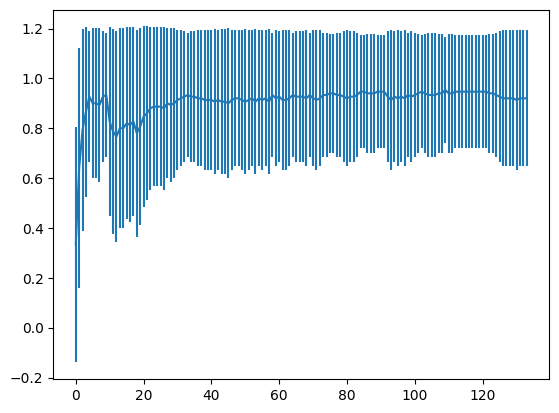

In [13]:
res = run.predictions
print(res.columns)
res["is_correct"] = res["prediction"] == res["correct"]
import matplotlib.pyplot as plt
import numpy as np
grouped_res = res.groupby(["cycle"])["is_correct"]
plt.errorbar(x=np.arange(len(grouped_res)), y=grouped_res.mean(), yerr=grouped_res.std())

In [15]:
flow._to_dict()

OrderedDict([('oml:flow',
              OrderedDict([('@xmlns:oml', 'http://openml.org/openml'),
                           ('oml:id', 5272),
                           ('oml:uploader', '3229'),
                           ('oml:name',
                            'openml_skactiveml.extension.PoolSkactivemlModel(prediction_model=skactiveml.classifier._parzen_window_classifier.ParzenWindowClassifier,query_strategy=skactiveml.pool._greedy_sampling.GreedySamplingX)'),
                           ('oml:custom_name',
                            'openml_skactiveml.PoolSkactivemlModel'),
                           ('oml:class_name',
                            'openml_skactiveml.extension.PoolSkactivemlModel'),
                           ('oml:version', '1'),
                           ('oml:external_version',
                            ',openml==0.13.1.dev,openml_skactiveml==0.0.1,skactiveml==0.4.1,'),
                           ('oml:description',
                            'Pool Skactiveml 